# Function Transformer
1. Logarithmic Transformation
2. Reciprocal Transformation
3. Square Root Transformation
4. Custom (i can transform data in normal distribution by my self by applying any mathematical equation)
5. X square Transformation

# Power Transformation
1. Box Cox Transformation
2. Yeo-Johnson

## Log Transformer
* It should apply on only positive values because log can't be apply on negative numbers
* It should be applied on right skewed data

## Square Transformation
1. It should apply on left skewed Data

In [1]:
import numpy as np # for mathematical applications
import pandas as pd # for preprocessing

import scipy.stats as stats  # for QQplot

import matplotlib.pyplot as plt #for visualization
import seaborn as sns # for visualization

from sklearn.model_selection import train_test_split # for train test split
from sklearn.metrics import accuracy_score # for checking the R2 accuracy
from sklearn.model_selection import cross_val_score # checking cross validation score

from sklearn.linear_model import LogisticRegression # Logistic regression model
from sklearn.tree import DecisionTreeClassifier # Decision tree model

from sklearn.preprocessing import FunctionTransformer  # for function tramsformation
from sklearn.compose import ColumnTransformer # for Power transformation

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('images/Titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
print("Mean of Age is: ",df['Age'].mean())
print("Median of Age is: ",df['Age'].median())

Mean of Age is:  29.69911764705882
Median of Age is:  28.0


In [5]:
df['Age'].fillna(df['Age'].median(), inplace=True)

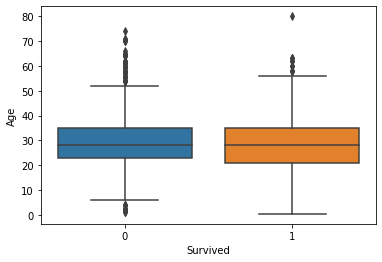

In [6]:
sns.boxplot(y='Age',x='Survived',data=df)
plt.show()

In [7]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y ,test_size=0.2, random_state=True)

In [9]:
X_train

,Age,Fare
301,28.0,23.2500
309,30.0,56.9292
516,34.0,10.5000
120,21.0,73.5000
570,62.0,10.5000
...,...,...
715,19.0,7.6500
767,30.5,7.7500
72,21.0,73.5000
235,28.0,7.5500


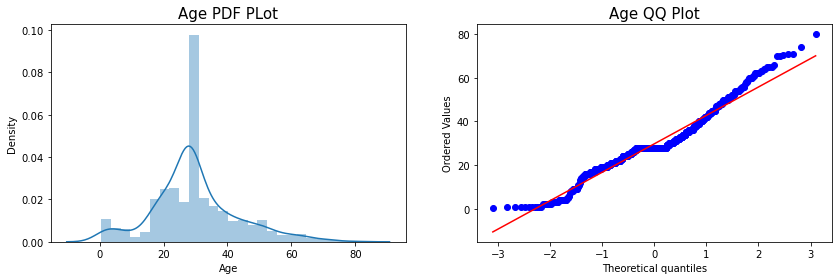

In [10]:
# now check that our data is normally distributed or not
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title("Age PDF PLot", size=15)

plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ Plot', size=15)

plt.show()

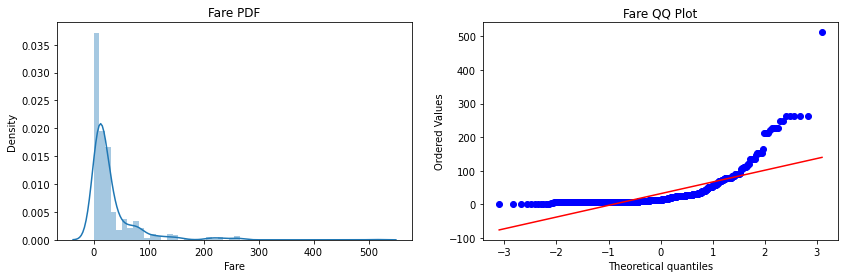

In [11]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title("Fare PDF")

plt.subplot(122)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title("Fare QQ Plot")
plt.show()

In [12]:
def plot_data(df, feature):
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df[feature])
    plt.title(feature+" PDF Plot")

    plt.subplot(122)
    stats.probplot(df[feature], dist='norm', plot=plt)
    plt.title(feature+" QQ Plot")

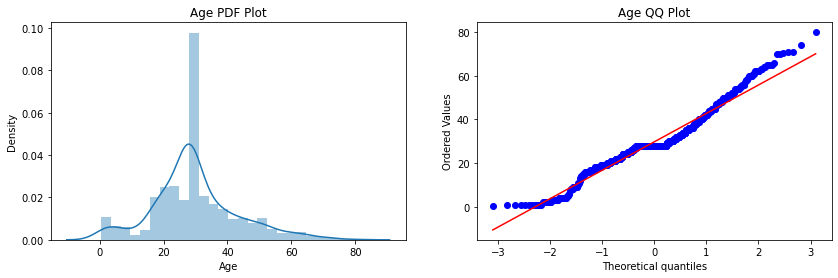

In [13]:
plot_data(X_train, 'Age')
plt.show()

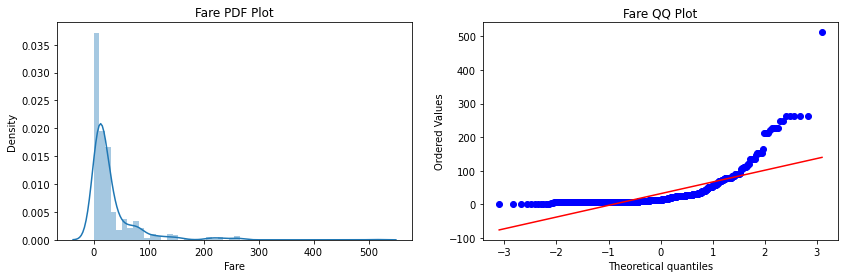

In [14]:
plot_data(X_train, 'Fare')

In [15]:
lr = LogisticRegression()
clf = DecisionTreeClassifier()

In [16]:
lr.fit(X_train,y_train)
clf.fit(X_train,y_train)
    
y_pred1 = lr.predict(X_test)
y_pred2 = clf.predict(X_test)
    
print("Accuracy LR",accuracy_score(y_test,y_pred1))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6089385474860335
Accuracy DT 0.6368715083798883


In [17]:
trf = FunctionTransformer(func=np.log1p) # np.log1p convert the negative or zero values automatically positive.
# it actually adding 1 in every value like x+1

In [18]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [19]:
lr = LogisticRegression()
clf = DecisionTreeClassifier()

lr.fit(X_train_transformed,y_train)
clf.fit(X_train_transformed,y_train)

y_pred1 = lr.predict(X_test)
y_pred2 = clf.predict(X_test)
    
print("Accuracy LR",accuracy_score(y_test,y_pred1))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6256983240223464
Accuracy DT 0.5865921787709497


In [20]:
X_transformed = trf.fit_transform(X)

lr = LogisticRegression()
clf = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(lr,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.663270911360799


Text(0.5, 1.0, 'Fare After Log')

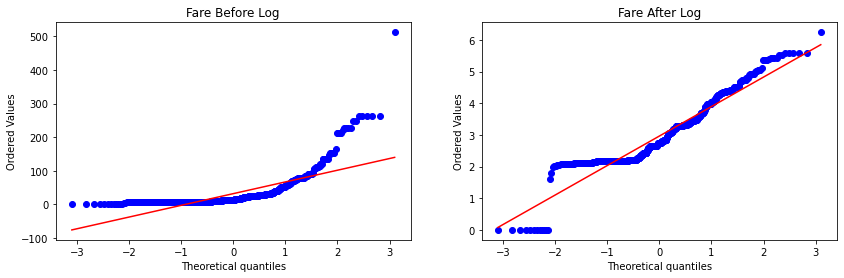

In [21]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title("Fare Before Log")
    
plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist='norm', plot=plt)
plt.title("Fare After Log")

Text(0.5, 1.0, 'Age After Log')

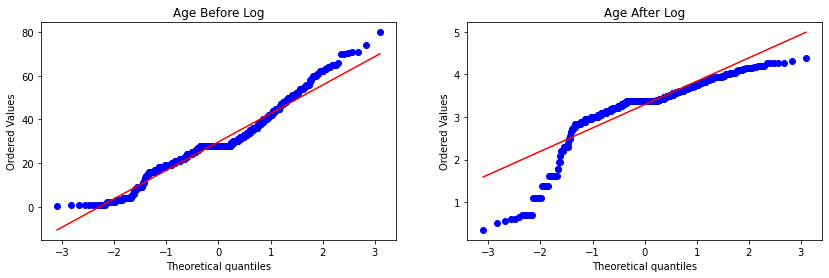

In [22]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title("Age Before Log")
    
plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist='norm', plot=plt)
plt.title("Age After Log")

In [23]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [24]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6368715083798883
Accuracy DT 0.6368715083798883


In [25]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6690137328339576
DT 0.6644194756554307


In [26]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6206367041198503


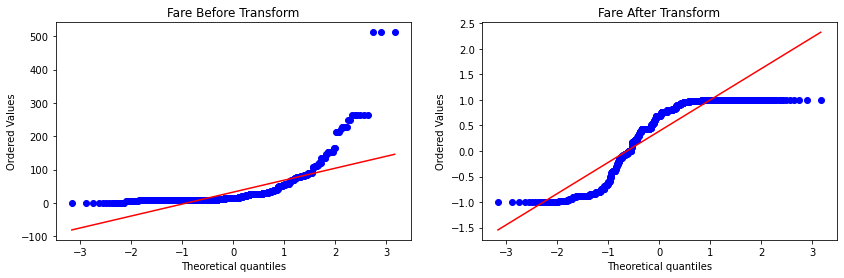

In [27]:
apply_transform(np.sin)

## Exponential Transformation

In [42]:
df = pd.read_csv('images/Titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [43]:
def plot_data(df, feature):
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.title(feature+" PDF Plot")
    sns.distplot(X_train[feature])
    
    plt.subplot(122)
    stats.probplot(X_train[feature], dist='norm', plot=plt)
    plt.title(feature+" QQ Plot")
    plt.show()

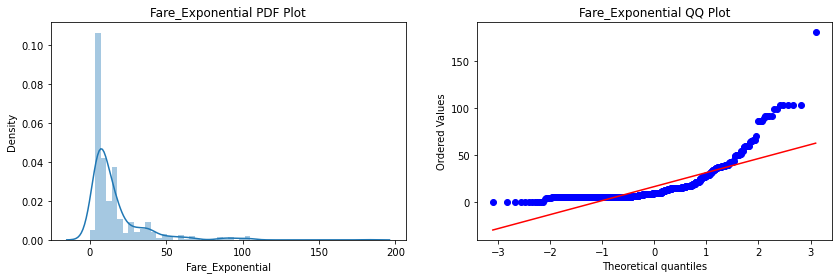

In [45]:
df['Fare_Exponential'] = df.Fare**(1/1.2)
plot_data(df, 'Fare_Exponential')